In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



In [19]:
# read table for Timeline Followback (TFB) data, which are the self reported drug use surveys

s = pd.read_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/raw_data_files/T_FRTFB.csv')

# show shape and head
display(s.shape)
s[:5]

(100518, 56)

,PATIENTNUMBER,SITE,VISIT,PATIENTID,VISITID,TFB002A,TFB002A_UNIT,TFB002A_NORM,TFB002B,TFB003A,TFB003A_UNIT,TFB003A_NORM,VISITDT,VISITDT_DT,TFB001,TFB001A,TFB001A_UNIT,TFB001A_NORM,TFB001B,TFB001C,TFB011A,TFB011A_UNIT,TFB011A_NORM,TFB011B,TFB011C,TFB010A,TFB010A_UNIT,TFB010A_NORM,TFB010B,TFB009A,TFB009A_UNIT,TFB009A_NORM,TFB009B,TFB004A,TFB004A_UNIT,TFB004A_NORM,TFB004B,TFB005A,TFB005A_UNIT,TFB005A_NORM,TFB005B,TFB006A,TFB006A_UNIT,TFB006A_NORM,TFB006B,TFB007A,TFB007A_UNIT,TFB007A_NORM,TFB007B,TFB008A,TFB008A_UNIT,TFB008A_NORM,TFB008B,TFB003B,TFB001_dt,patdeid
0,NaN,NaN,BASELINE,NaN,15031,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,5.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,-31.0,1
1,NaN,NaN,BASELINE,NaN,15031,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,5.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,-32.0,1
2,NaN,NaN,BASELINE,NaN,15031,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,5.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,-30.0,1
3,NaN,NaN,BASELINE,NaN,15031,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,5.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,-29.0,1
4,NaN,NaN,BASELINE,NaN,15031,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,5.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,-28.0,1


In [20]:
# drop columns whose data is not being analyzed for this project

s = s.drop(columns=['PATIENTNUMBER','SITE','PATIENTID','VISITID','TFB002A_UNIT','TFB002A_NORM','TFB002B',
'TFB003A_UNIT','TFB003A_NORM','VISITDT','VISITDT_DT','TFB001', 'TFB001A_UNIT','TFB001A_NORM','TFB001C','TFB011A_UNIT','TFB011A_NORM','TFB011B','TFB011C','TFB010A_UNIT','TFB010A_NORM','TFB010B','TFB009A_UNIT','TFB009A_NORM','TFB009B','TFB004A_UNIT','TFB004A_NORM','TFB004B','TFB005A_UNIT','TFB005A_NORM','TFB005B','TFB006A_UNIT','TFB006A_NORM','TFB006B','TFB007A_UNIT','TFB007A_NORM','TFB007B','TFB008A_UNIT','TFB008A_NORM','TFB008B','TFB003B','TFB001_dt'], axis=1)

In [21]:
# eyeball columns to see what's left

display(s.shape)
s[:5]

(100518, 14)

,VISIT,TFB002A,TFB003A,TFB001A,TFB001B,TFB011A,TFB010A,TFB009A,TFB004A,TFB005A,TFB006A,TFB007A,TFB008A,patdeid
0,BASELINE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,BASELINE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,BASELINE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,BASELINE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,BASELINE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [22]:
# rename columns according to documentation for interpretability

new_columns = {'TFB001B':'alc_qty','TFB002A':'sru_cannabis','TFB003A':'sru_cocaine','TFB001A':'sru_alcohol','TFB011A':'sru_other','TFB010A':'sru_oxycodone','TFB009A':'sru_methadone','TFB004A':'sru_amphetamine','TFB005A':'sru_methamphetamine','TFB006A':'sru_opiates','TFB007A':'sru_benzodiazepines','TFB008A':'sru_propoxyphene'}


In [23]:
# renaming columns

s = s.rename(columns=new_columns)

s[:5]

,VISIT,sru_cannabis,sru_cocaine,sru_alcohol,alc_qty,sru_other,sru_oxycodone,sru_methadone,sru_amphetamine,sru_methamphetamine,sru_opiates,sru_benzodiazepines,sru_propoxyphene,patdeid
0,BASELINE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,BASELINE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,BASELINE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,BASELINE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,BASELINE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [24]:
# reorder index for easier interpretation

s = s.reindex(columns=['patdeid','VISIT','sru_alcohol','alc_qty','sru_cannabis','sru_cocaine','sru_amphetamine','sru_methamphetamine','sru_opiates','sru_benzodiazepines','sru_propoxyphene','sru_methadone','sru_oxycodone','sru_other'])

s[:5]

,patdeid,VISIT,sru_alcohol,alc_qty,sru_cannabis,sru_cocaine,sru_amphetamine,sru_methamphetamine,sru_opiates,sru_benzodiazepines,sru_propoxyphene,sru_methadone,sru_oxycodone,sru_other
0,1,BASELINE,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,BASELINE,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,BASELINE,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,BASELINE,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,BASELINE,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# remove 'WK' from VISIT column to preserve int for ordinal value in sequencing time
s.VISIT = s.VISIT.str.replace('WK','')

# replace BASELINE with 0 and change dtype to int
s.VISIT.replace('BASELINE','0', inplace=True)

# convert column data type to int65
s.VISIT.astype(np.int64)

# show first 5 rows
s[:5]

,patdeid,VISIT,sru_alcohol,alc_qty,sru_cannabis,sru_cocaine,sru_amphetamine,sru_methamphetamine,sru_opiates,sru_benzodiazepines,sru_propoxyphene,sru_methadone,sru_oxycodone,sru_other
0,1,0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# display value counts for features other than first column, the display again with normalize=True parameter to see percentages

for col in s.columns:
    if col != 'patdeid':
        print(s[col].value_counts())
        print('----------------------')
        print(s[col].value_counts(normalize=True))
        print('----------------------')
        print('----------------------')

VISIT
0     47412
4     12150
24     7764
32     7436
8      7379
12     7040
16     5979
20     5358
Name: count, dtype: int64
----------------------
VISIT
0     0.471677
4     0.120874
24    0.077240
32    0.073977
8     0.073410
12    0.070037
16    0.059482
20    0.053304
Name: proportion, dtype: float64
----------------------
----------------------
sru_alcohol
0.0    91005
1.0     9274
Name: count, dtype: int64
----------------------
sru_alcohol
0.0    0.907518
1.0    0.092482
Name: proportion, dtype: float64
----------------------
----------------------
alc_qty
2 beers                                               804
1 beer                                                783
4 drinks                                              599
2 drinks                                              396
3 beers                                               369
3 drinks                                              249
2 drinks (2 beers)                                    222
2 Beers             

## Notes from feature analysis
patdeid - Looks fine<br>
VISIT - change data type to np.datetime64<br>
sru_alchol - Looks fine<br>
alc_qty - Txt column - inspect further<br>
sru_cannabis - Looks fine<br>
sru_cocaine - Looks fine<br>
sru_amphetamine - Looks fine<br>
sru_methamphetamine - Looks fine<br>
sru_opiates - Looks fine<br>
sru_benzodiazepines - Looks fine<br>
sru_propoxyphene - Only 41 positive tests, data is trivial, column to be dropped<br>
sru_methadone - Looks fine<br>
sru_oxycodone - Looks fine<br>
sru_other - Looks fine<br>






In [27]:
# change dtype for VISIT to np.int64
s.VISIT = s.VISIT.astype(np.int64)


In [28]:
# inspect text column 'alc_qty'
print(f'Length of alc_qty column is: {s.alc_qty.value_counts().size}')

Length of alc_qty column is: 1099


In [29]:
# replace nulls in alc_qty with 0.0
s.alc_qty.fillna(0.0, inplace=True)

In [30]:
# if item in alc_qty is not 0.0 replace with 1.0
s.alc_qty = s.alc_qty.apply(lambda x: 1.0 if x != 0.0 else x)


In [31]:
# look at value counts
s.alc_qty.value_counts()


alc_qty
0.0    91245
1.0     9273
Name: count, dtype: int64

In [32]:
# look at value counts to see if there is coliniarity
display(s.alc_qty.value_counts())
display(s.sru_alcohol.value_counts())

alc_qty
0.0    91245
1.0     9273
Name: count, dtype: int64

sru_alcohol
0.0    91005
1.0     9274
Name: count, dtype: int64

In [33]:
# test sru_alcohol and alc_qty for coliniarit
print(f'Pairwise correlation for sru_alcohol/alc_qty: {s.sru_alcohol.corr(s.alc_qty)}')

Pairwise correlation for sru_alcohol/alc_qty: 0.9999405905157941


In [34]:
# drop alc_qty column
s.drop(columns='alc_qty', inplace=True)

In [35]:
# inspect and replace nulls
s.isnull().sum()


In [36]:

# replace nulls with 0.0
s.fillna(0.0, inplace=True)

In [37]:
# create feature to pull random number from patdeid column
def random_patient(df):
    return np.random.choice(df.patdeid.unique())

In [41]:
# Sample patient data for issues - each time you run the cell a new patient is selected

s.loc[s.patdeid==random_patient(s)].groupby(['patdeid','VISIT']).sum().sort_values(by='VISIT', ascending=True)


sru_alcohol  sru_cannabis  sru_cocaine  sru_amphetamine  \
patdeid VISIT                                                            
1866    0              0.0           0.0          0.0              0.0   
        24             0.0           0.0          0.0              0.0   

               sru_methamphetamine  sru_opiates  sru_benzodiazepines  \
patdeid VISIT                                                          
1866    0                      0.0         30.0                  0.0   
        24                     0.0         13.0                  0.0   

               sru_propoxyphene  sru_methadone  sru_oxycodone  sru_other  
patdeid VISIT                                                             
1866    0                   0.0            0.0            0.0        0.0  
        24                  0.0            0.0            0.0        0.0

In [42]:
# drop propoxyphene column
s.drop(columns='sru_propoxyphene', inplace=True)


In [43]:
# view shape
s.shape

(100518, 12)

### now that the data is clean, we will do some basic EDA

In [44]:
#create dictionary from sum columns as key and 'sum' as value, exclude patdeid and VISIT
sum_dict = {col:'sum' for col in s.columns if col not in ['patdeid','VISIT']}

sum_dict

{'sru_alcohol': 'sum',
 'sru_cannabis': 'sum',
 'sru_cocaine': 'sum',
 'sru_amphetamine': 'sum',
 'sru_methamphetamine': 'sum',
 'sru_opiates': 'sum',
 'sru_benzodiazepines': 'sum',
 'sru_methadone': 'sum',
 'sru_oxycodone': 'sum',
 'sru_other': 'sum'}

In [46]:
# groupby with patdeid as index and .agg for VISIT: first and sum for all other columns
sru_monthly = s.groupby('VISIT').agg(sum_dict).sort_values(by='VISIT', ascending=True).astype(np.int64)

sru_monthly

,sru_alcohol,sru_cannabis,sru_cocaine,sru_amphetamine,sru_methamphetamine,sru_opiates,sru_benzodiazepines,sru_methadone,sru_oxycodone,sru_other
VISIT,,,,,,,,,,
0,2889,4487,5851,298,727,40889,1245,2560,4072,827
4,876,2568,2382,91,421,6010,344,96,412,161
8,870,2158,1590,23,338,2162,342,40,148,58
12,830,2013,1799,50,396,2206,379,7,125,66
16,768,2094,1446,29,340,1581,314,19,142,56
20,695,1997,1218,25,325,1293,320,22,55,72
24,970,2231,1780,82,351,2932,420,136,189,171
32,1376,2236,1702,53,301,2493,446,53,146,71


sru_amphetamine          651
sru_other               1482
sru_methadone           2933
sru_methamphetamine     3199
sru_benzodiazepines     3810
sru_oxycodone           5289
sru_alcohol             9274
sru_cocaine            17768
sru_cannabis           19784
sru_opiates            59566
dtype: int64

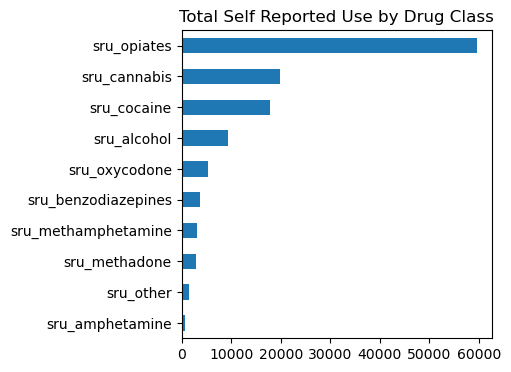

In [59]:
# show sum of self reported use of each drug by class
display(sru_monthly.sum().sort_values(ascending=True))

sru_monthly.sum().sort_values(ascending=True).plot(kind='barh',figsize=(4,4), 
title='Total Self Reported Use by Drug Class');


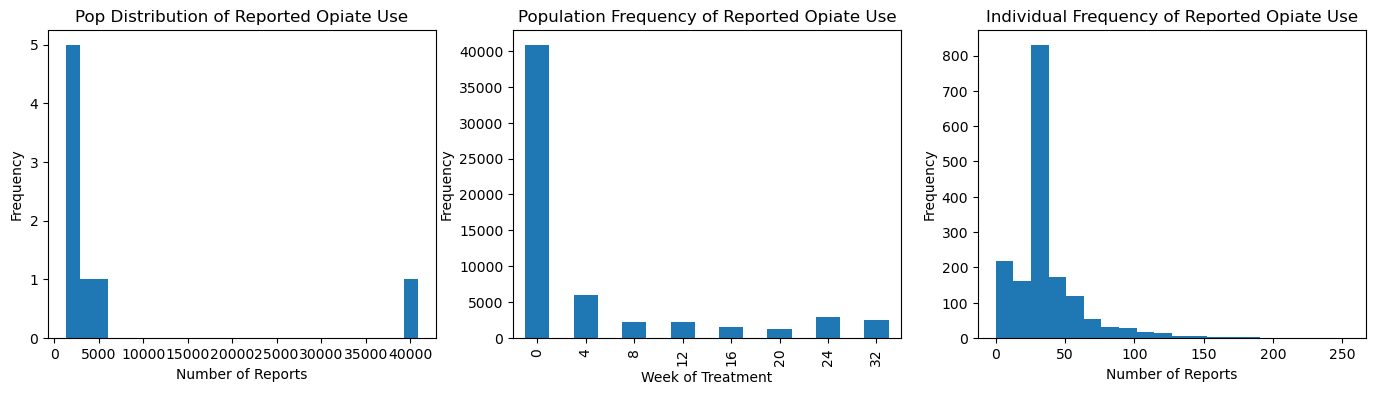

In [80]:
# create two plots to show distribution and monthly frequency of reported opiate use
fig, ax = plt.subplots(1,3, figsize=(17,4))
sru_monthly.sru_opiates.hist(bins=25,grid=False, ax=ax[0]);
sru_monthly.loc[:,['sru_opiates']].plot(kind='bar', legend=False, ax=ax[1]);
sru_agg.sru_opiates.plot(kind='hist', bins=20, grid=False, ax=ax[2]);
ax[0].set_title('Pop Distribution of Reported Opiate Use');
ax[1].set_title('Population Frequency of Reported Opiate Use');
ax[0].set_xlabel('Number of Reports');
ax[1].set_xlabel('Week of Treatment');
ax[0].set_ylabel('Frequency');
ax[1].set_ylabel('Frequency');
ax[2].set_title('Individual Frequency of Reported Opiate Use');
ax[2].set_xlabel('Number of Reports');
ax[2].set_ylabel('Frequency');




In [72]:
# agregating visit by count - essentially counting how many entries for self reported use
# add row to first position of sum_dict for 'VISIT':'count' as first entry in dict
sum_dict = {'VISIT':'count', **sum_dict}

In [77]:
sru_agg = s.groupby('patdeid').agg(sum_dict)

In [ ]:
s.to_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/s_clean.csv')